<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. scikit-learn: sklearn 機器學習
2. pandas: 表格處理
3. numpy: 多維陣列函式庫
4. opencv: 影像處理/AI函式庫
5. Pillow(PIL): 影像處理
6. matplotlib: 視覺化基礎函式庫
7. seaborn: 視覺化進階函式庫

資料量需求
1. 機器學習: 1k-1w以上
2. 深度學習: 1w-10w以上

題目難度 <-> 資料需求
1. 簡單: 少點ok
2. 難: 多一點

題目難度可以參考欄位數目

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = iris["target"]
# 順便複習
total = x[:]
total["ans"] = iris["target"]
total.to_csv("iris.csv", index=False, encoding="utf-8")

<ipython-input-22-d1acc042ba54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total["ans"] = iris["target"]


先把你的資料分成兩分: 一份訓練/一份驗證

進到sklearn以前: pd.DataFrame

進到sklearn以後(train_test_split): np.array

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], test_size=1)
x_np = np.array(x)
y_np = np.array(y)
# 90%xnp, 10%xnp, 90%ynp, 10%ynp
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [24]:
from sklearn.tree import  DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

決策樹每一層的選擇: 目標(確定程度提高最高) -> Gini(猜錯機率)降低

一顆決策樹 -> 信心程度100%(Gini=0)

$ Gini = \sum p_i(1-p_i) $

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.183\nsamples = 49\nvalue = [0, 44, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

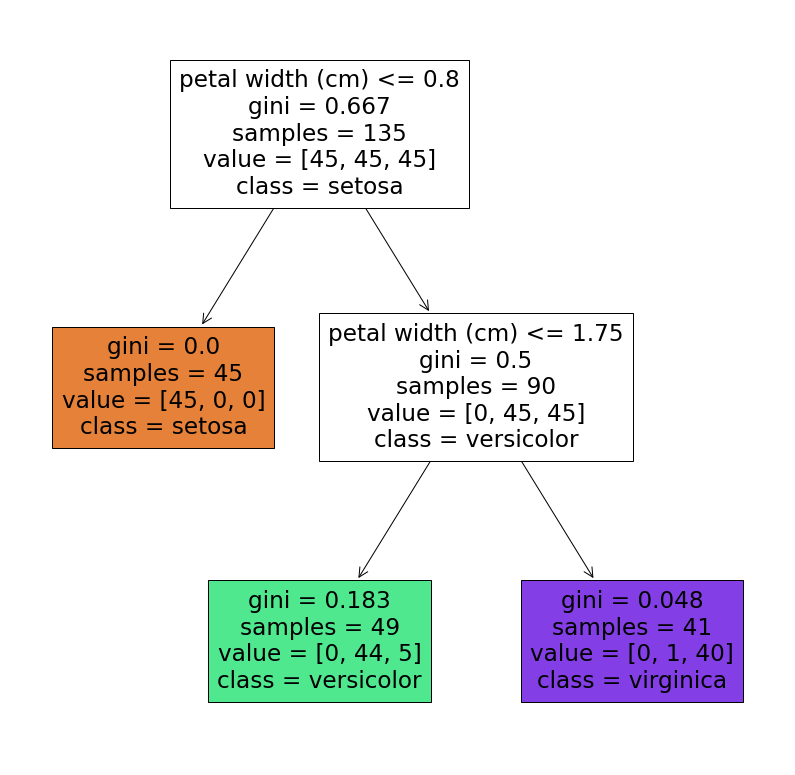

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=x.columns, 
     class_names=iris["target_names"],
     filled=True)

In [26]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0

1. 模型不要學到完美(學到太多稀少例外導致沒看過的問題錯更多) -> 避免過擬合
2. 決策樹優點 -> 可解釋性